# Pandas

In [88]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('/kaggle/input/sample-dataset/Sample_Sales_Dataset.csv')

Load the dataset and display the first 10 rows.

In [90]:
df.head(10)

,order_id,product,category,region,order_date,sales,cost
0,ORD1000,Pen,Office Supplies,East,2022-01-01,497.24,254.112865
1,ORD1001,Laptop,Furniture,North,2022-01-02,1128.75,576.843973
2,ORD1002,Monitor,Furniture,West,2022-01-03,1421.99,726.703309
3,ORD1003,Laptop,Furniture,South,2022-01-04,534.25,273.026704
4,ORD1004,Laptop,Office Supplies,South,2022-01-05,432.41,220.981707
5,ORD1005,Table,Furniture,North,2022-01-06,1966.12,1004.779155
6,ORD1006,Monitor,Furniture,North,2022-01-07,1081.61,552.753231
7,ORD1007,Monitor,Office Supplies,West,2022-01-08,595.58,304.369199
8,ORD1008,Monitor,Office Supplies,South,2022-01-09,1992.88,1018.454765
9,ORD1009,Laptop,Office Supplies,South,2022-01-10,1934.30,988.517649


What is the shape of the dataset?

In [91]:
df.shape

(100, 7)

List all the column names and their data types.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    100 non-null    object 
 1   product     100 non-null    object 
 2   category    100 non-null    object 
 3   region      100 non-null    object 
 4   order_date  100 non-null    object 
 5   sales       100 non-null    float64
 6   cost        100 non-null    float64
dtypes: float64(2), object(5)
memory usage: 5.6+ KB


Are there any missing values in the dataset? How many in each column?

In [93]:
df.isnull().sum()

order_id      0
product       0
category      0
region        0
order_date    0
sales         0
cost          0
dtype: int64

Find the number of unique values in each of these columns:

product

region

category

In [94]:
df['product'].unique()

array(['Pen', 'Laptop', 'Monitor', 'Table', 'Phone', 'Chair'],
      dtype=object)

In [95]:
df['region'].unique()

array(['East', 'North', 'West', 'South'], dtype=object)

In [96]:
df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

Create a new column profit = sales - cost.

In [97]:
df['profit']=df['sales']-df['cost']

In [98]:
df.head()

,order_id,product,category,region,order_date,sales,cost,profit
0,ORD1000,Pen,Office Supplies,East,2022-01-01,497.24,254.112865,243.127135
1,ORD1001,Laptop,Furniture,North,2022-01-02,1128.75,576.843973,551.906027
2,ORD1002,Monitor,Furniture,West,2022-01-03,1421.99,726.703309,695.286691
3,ORD1003,Laptop,Furniture,South,2022-01-04,534.25,273.026704,261.223296
4,ORD1004,Laptop,Office Supplies,South,2022-01-05,432.41,220.981707,211.428293


What is the total sales, total cost, and total profit?

In [99]:
print("Total Sale",df['sales'].sum())
print('Total Cost',df['cost'].sum())
print("Total Profit",df['profit'].sum())

Total Sale 108307.99
Total Cost 55350.44182077179
Total Profit 52957.54817922821


Sort and display the top 5 most profitable orders.

In [100]:
print(df.sort_values(by='profit', ascending=False).head())

   order_id  product         category region  order_date    sales  \
8   ORD1008  Monitor  Office Supplies  South  2022-01-09  1992.88   
58  ORD1058      Pen        Furniture   East  2022-02-28  1989.65   
31  ORD1031    Table  Office Supplies   West  2022-02-01  1989.47   
5   ORD1005    Table        Furniture  North  2022-01-06  1966.12   
67  ORD1067      Pen  Office Supplies   East  2022-03-09  1962.63   

           cost      profit  
8   1018.454765  974.425235  
58  1016.804084  972.845916  
31  1016.712096  972.757904  
5   1004.779155  961.340845  
67  1002.995602  959.634398  


Find which product has the lowest average cost.



In [101]:
df.groupby('product')['cost'].mean().idxmin()

'Chair'

Filter all orders where:

Region is "South"

Sales > ₹1000

In [102]:
df[(df['region']=='South') & (df['sales']>1000)]

,order_id,product,category,region,order_date,sales,cost,profit
8,ORD1008,Monitor,Office Supplies,South,2022-01-09,1992.88,1018.454765,974.425235
9,ORD1009,Laptop,Office Supplies,South,2022-01-10,1934.30,988.517649,945.782351
10,ORD1010,Pen,Furniture,South,2022-01-11,1160.76,593.202578,567.557422
18,ORD1018,Table,Technology,South,2022-01-19,1786.76,913.117817,873.642183
26,ORD1026,Pen,Technology,South,2022-01-27,1949.96,996.520640,953.439360
45,ORD1045,Chair,Office Supplies,South,2022-02-15,1959.90,1001.600444,958.299556
47,ORD1047,Pen,Office Supplies,South,2022-02-17,1821.59,930.917574,890.672426
52,ORD1052,Table,Office Supplies,South,2022-02-22,1741.92,890.202483,851.717517
65,ORD1065,Pen,Furniture,South,2022-03-07,1150.25,587.831477,562.418523
66,ORD1066,Table,Office Supplies,South,2022-03-08,1187.36,606.796420,580.563580


Group the total sales by each region.

In [103]:
df.groupby('region')['sales'].sum()

region
East     24967.40
North    24629.78
South    35715.57
West     22995.24
Name: sales, dtype: float64

Calculate the average profit per product.

In [104]:
df.groupby('product')['profit'].mean()

product
Chair      442.142237
Laptop     606.418567
Monitor    601.011162
Pen        487.915537
Phone      464.062980
Table      583.515056
Name: profit, dtype: float64

What is the total profit by category? Sort in descending order.

In [105]:
df.groupby('category')['profit'].sum().sort_values(ascending=False)

category
Office Supplies    22159.343601
Furniture          20114.193780
Technology         10684.010797
Name: profit, dtype: float64

What is the total number of orders for each category?

In [106]:
df['category'].value_counts()

category
Office Supplies    41
Furniture          36
Technology         23
Name: count, dtype: int64

Show all records where profit is greater than the average profit.

In [107]:
print(df[(df['profit'])>(df['profit'].mean())][['order_id', 'category', 'profit']])

   order_id         category      profit
1   ORD1001        Furniture  551.906027
2   ORD1002        Furniture  695.286691
5   ORD1005        Furniture  961.340845
8   ORD1008  Office Supplies  974.425235
9   ORD1009  Office Supplies  945.782351
10  ORD1010        Furniture  567.557422
11  ORD1011  Office Supplies  868.874888
14  ORD1014  Office Supplies  699.535695
15  ORD1015        Furniture  835.454931
16  ORD1016       Technology  844.432113
18  ORD1018       Technology  873.642183
19  ORD1019        Furniture  839.415452
20  ORD1020  Office Supplies  918.112485
21  ORD1021        Furniture  778.486983
22  ORD1022       Technology  670.394079
23  ORD1023        Furniture  588.357495
25  ORD1025  Office Supplies  922.288146
26  ORD1026       Technology  953.439360
31  ORD1031  Office Supplies  972.757904
37  ORD1037  Office Supplies  740.236167
38  ORD1038        Furniture  718.658658
40  ORD1040       Technology  552.923050
42  ORD1042  Office Supplies  640.054527
44  ORD1044  Off

Find the top 3 products by total sales in the "Technology" category.

In [108]:
df[df['category']=='Technology'].groupby('product')['sales'].sum().sort_values(ascending=False).head(3)

product
Phone    7315.13
Pen      6043.22
Table    4669.01
Name: sales, dtype: float64

Which region has the highest average sales per order?

In [109]:
highest_avg_region = df.groupby('region')['sales'].mean().idxmax()
print("Region with highest average sales per order:", highest_avg_region)

Region with highest average sales per order: West


Show the minimum, maximum, and average sales for each category.

In [110]:
df.groupby('category')['sales'].agg(['min','max','mean'])

,min,max,mean
category,,,
Furniture,255.03,1989.65,1142.701389
Office Supplies,109.85,1992.88,1105.364878
Technology,182.85,1949.96,950.033913


In each region, what is the most frequently sold product?

In [111]:
most_frequently=(df.groupby(['region','product'])
                .size()
                .reset_index(name='count')
                .sort_values(['region','count'],ascending=[True,False])
                .drop_duplicates(subset='region'))

In [112]:
most_frequently

,region,product,count
3,East,Pen,7
10,North,Phone,7
15,South,Pen,11
20,West,Monitor,5


Filter orders where:

Category = "Furniture"

Sales > ₹1500

Cost to Sales ratio < 0.7

In [113]:
df[(df['category']=='Furniture') 
& (df['sales']>1500) 
& ((df['cost']/df['sales'])<0.7)]

,order_id,product,category,region,order_date,sales,cost,profit
5,ORD1005,Table,Furniture,North,2022-01-06,1966.12,1004.779155,961.340845
15,ORD1015,Pen,Furniture,East,2022-01-16,1708.66,873.205069,835.454931
19,ORD1019,Pen,Furniture,West,2022-01-20,1716.76,877.344548,839.415452
21,ORD1021,Chair,Furniture,West,2022-01-22,1592.15,813.663017,778.486983
56,ORD1056,Table,Furniture,West,2022-02-26,1560.25,797.360627,762.889373
58,ORD1058,Pen,Furniture,East,2022-02-28,1989.65,1016.804084,972.845916
61,ORD1061,Laptop,Furniture,West,2022-03-03,1778.64,908.968118,869.671882
75,ORD1075,Laptop,Furniture,South,2022-03-17,1704.00,870.823592,833.176408
99,ORD1099,Laptop,Furniture,East,2022-04-10,1784.57,911.998625,872.571375


In [114]:
df['order_date']=pd.to_datetime(df['order_date'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    100 non-null    object        
 1   product     100 non-null    object        
 2   category    100 non-null    object        
 3   region      100 non-null    object        
 4   order_date  100 non-null    datetime64[ns]
 5   sales       100 non-null    float64       
 6   cost        100 non-null    float64       
 7   profit      100 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 6.4+ KB


# **Data Visualization with matplotlib & seaborn**

Plot a histogram of the sales column.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


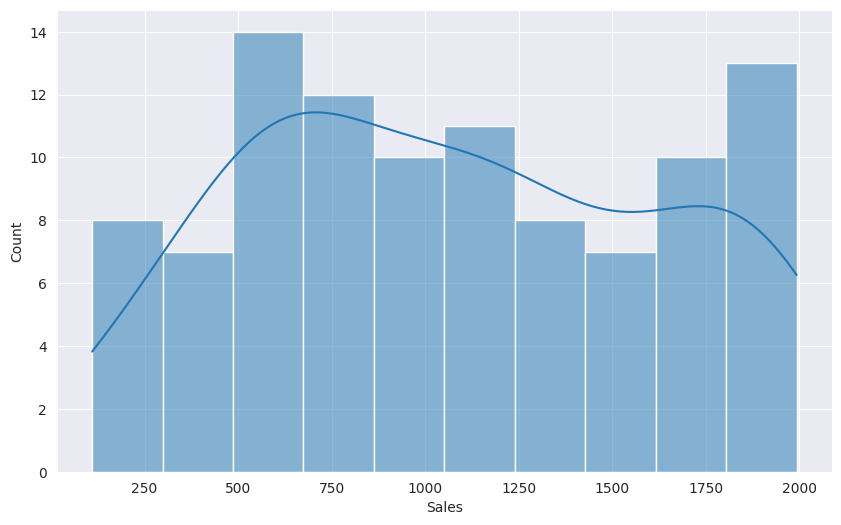

In [116]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(x='sales',data=df,bins=10,kde=True)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

Create a bar chart showing total sales for each region.

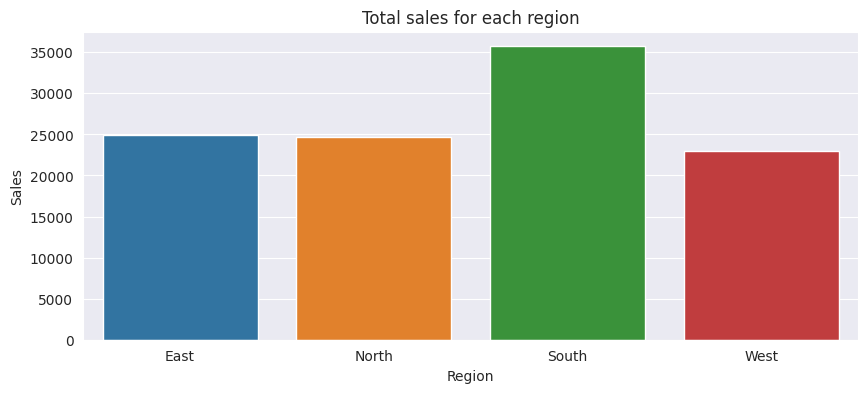

In [117]:
sns.set_style('darkgrid')
df2=df.groupby('region')['sales'].sum().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='region',y='sales',data=df2)
plt.title('Total sales for each region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

Use a boxplot to compare sales distributions across category.

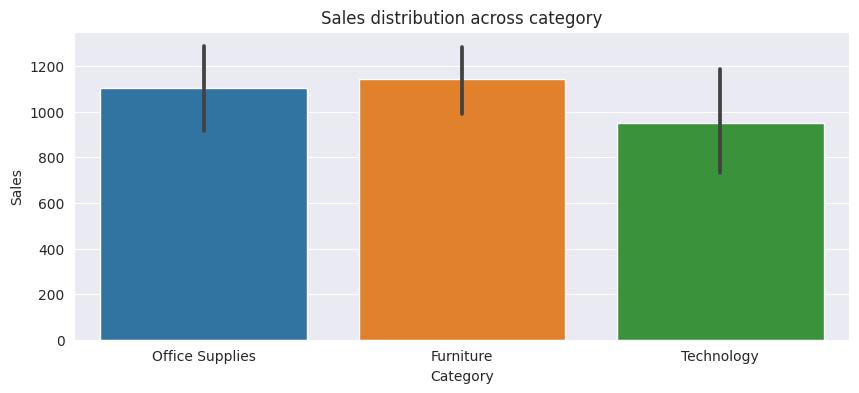

In [118]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.barplot(x='category',y='sales',data=df)
plt.title('Sales distribution across category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

Plot a line graph of total sales over time (by order_date).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


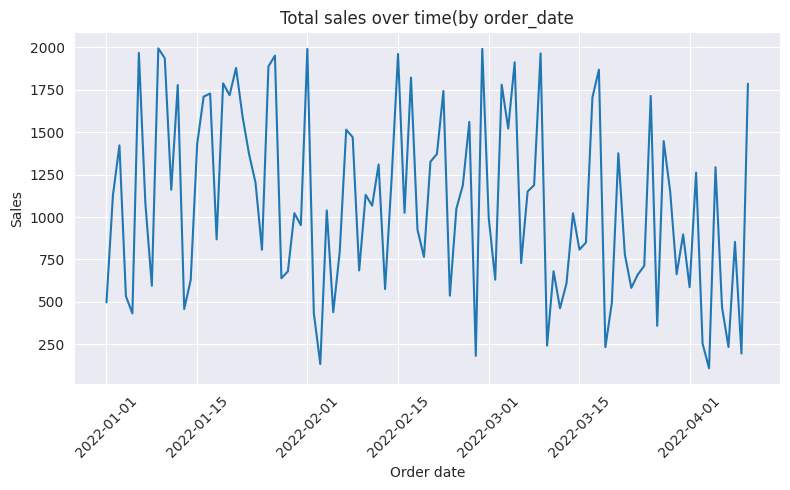

In [119]:
sns.set_style('darkgrid')
df3=df.groupby('order_date')['sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(y='sales',x='order_date',data=df3)
plt.title('Total sales over time(by order_date')
plt.xlabel('Order date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Show a scatter plot of sales vs cost

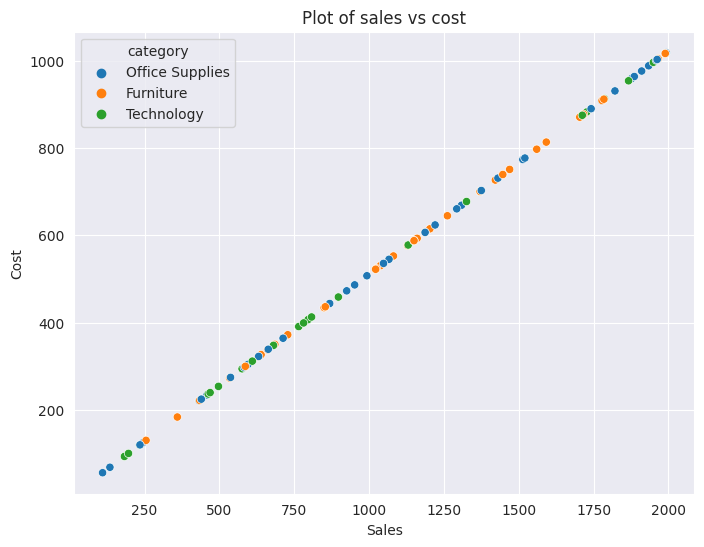

In [120]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.scatterplot(x='sales',y='cost',data=df,hue='category')
plt.title('Plot of sales vs cost')
plt.xlabel('Sales')
plt.ylabel('Cost')
plt.show()

Create a heatmap showing correlation between sales, cost, and profit.

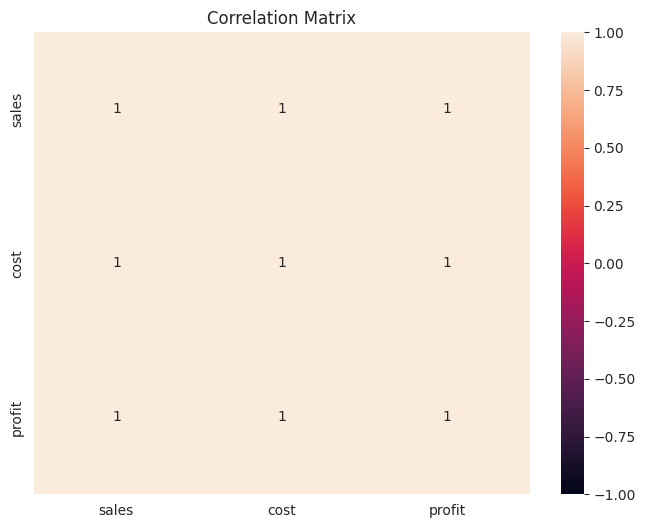

In [121]:
sns.set_style('darkgrid')
cor_scp=df[['sales','cost','profit']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor_scp,annot=True,vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Make a countplot of how many orders exist in each category.

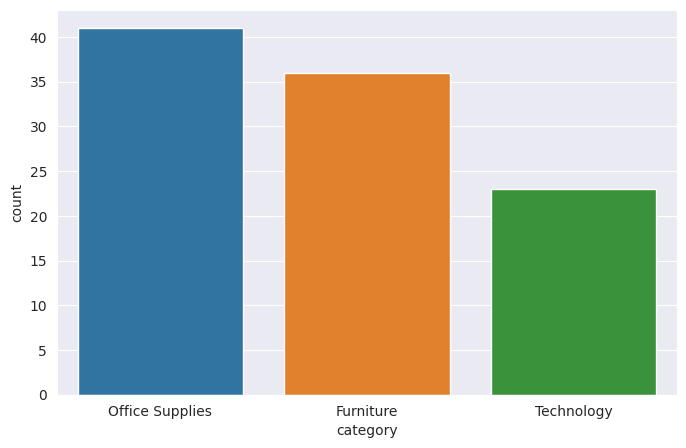

In [122]:
#df5=df.groupby('category')['order_id'].count()
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(x='category',data=df)
plt.show()

Show a bar plot of average profit per product — sorted high to low.

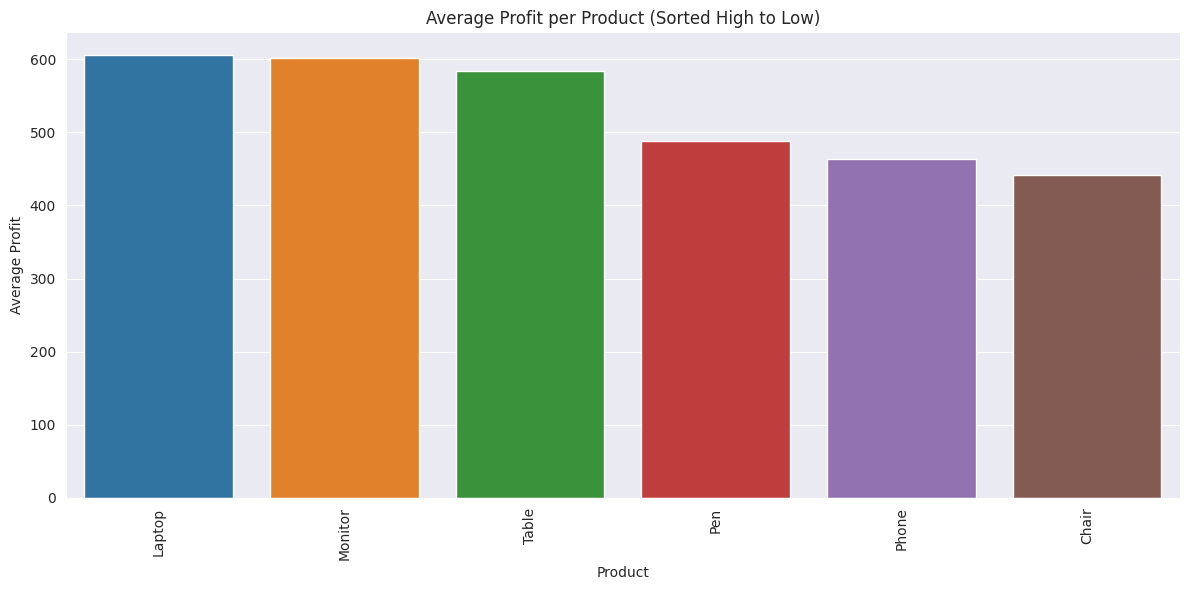

In [123]:
# Step 1: Compute average profit per product
sns.set_style('darkgrid')
avg_profit = df.groupby('product')['profit'].mean().reset_index()

# Step 2: Sort by profit descending
avg_profit = avg_profit.sort_values(by='profit', ascending=False)

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.barplot(x='product', y='profit', data=avg_profit)
plt.xticks(rotation=90)
plt.title('Average Profit per Product (Sorted High to Low)')
plt.xlabel('Product')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

Create a violin plot of sales by region.

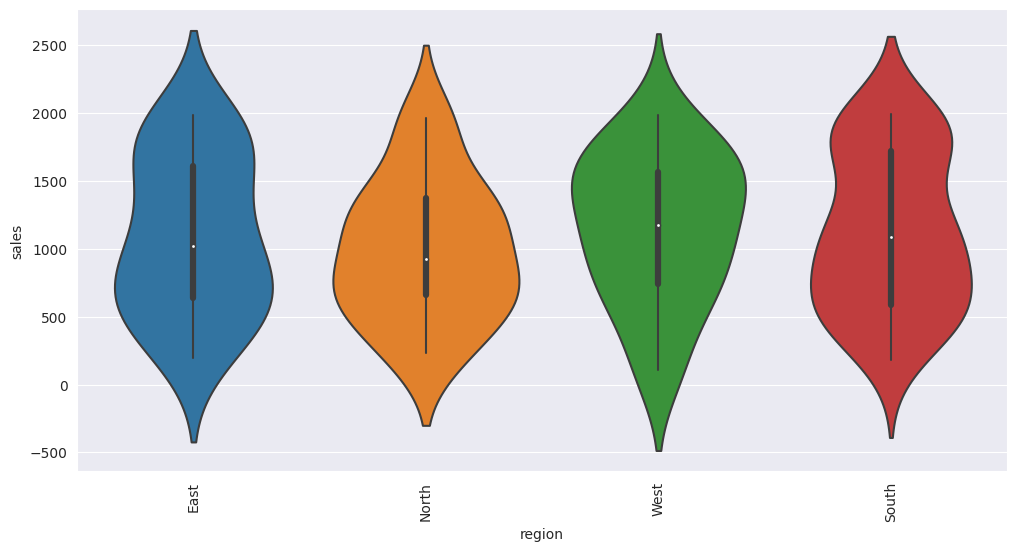

In [124]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.violinplot(x='region', y='sales', data=df)
plt.xticks(rotation=90)
plt.show()

Add titles, axis labels, and grid lines to all plots for clarity.

# **NumPy** 

Convert the sales column into a NumPy array.

In [125]:
num=df['sales'].to_numpy()

Use NumPy to calculate:

Mean, Median, Standard Deviation of sales

In [126]:
mean_n=np.mean(num)
stan=np.std(num)
print(np.median(num))
print(stan)
print(mean_n)

1043.435
545.4713634619054
1083.0799



Maximum and Minimum of cost

In [127]:
c_m=df['cost'].to_numpy()
c_m

array([ 254.11286546,  576.8439725 ,  726.70330937,  273.02670415,
        220.98170733, 1004.77915501,  552.75323065,  304.3691988 ,
       1018.45476493,  988.51764873,  593.20257765,  908.13511191,
        234.33535783,  321.88787997,  731.14430527,  873.20506937,
        882.58788694,  443.87983982,  913.11781733,  877.34454771,
        959.59751549,  813.66301734,  700.68592143,  614.94250464,
        412.58844984,  963.96185438,  996.52064019,  326.78881791,
        347.60886082,  522.63213764,  486.5215772 , 1016.71209566,
        221.92714374,   68.65401485,  530.67090237,  224.73790064,
        406.94138371,  773.68383331,  751.13134205,  350.23053044,
        577.90694966,  545.15907656,  668.97547315,  294.30157863,
        623.86026971, 1001.60044448,  523.72577759,  930.91757419,
        472.89707194,  391.0273892 ,  677.49462179,  700.62459583,
        890.2024829 ,  274.61094895,  535.81714272,  606.51534441,
        797.36062733,   93.44489069, 1016.80408406,  507.41316

In [128]:
print(np.max(c_m))
print(np.min(c_m))

1018.4547649326676
56.13848095613058


Normalize the sales column using:

Normalized=X-mean/std

In [129]:
Normalized=(num-mean_n)/stan

In [130]:
Normalized

array([-1.0740067 ,  0.08372594,  0.62131603, -1.00615713, -1.19285804,
        1.61885694, -0.00269473, -0.89372226,  1.66791542,  1.56052207,
        0.14240913,  1.27216596, -1.14495451, -0.83087753,  0.6372472 ,
        1.14686149,  1.18052045, -0.39325602,  1.29004041,  1.16171103,
        1.45677693,  0.93326641,  0.5279839 ,  0.22039672, -0.50550756,
        1.47243312,  1.58923118, -0.81329641, -0.73860871, -0.11074807,
       -0.24028741,  1.66166395, -1.18946648, -1.73930286, -0.08191062,
       -1.17938345, -0.52576527,  0.78984916,  0.70894666, -0.729204  ,
        0.08753915, -0.02993723,  0.41422908, -0.92983781,  0.2523874 ,
        1.60745395, -0.10682486,  1.35389344, -0.28916257, -0.58285351,
        0.4447898 ,  0.52776391,  1.20783628, -1.00047397, -0.06344953,
        0.19016599,  0.87478488, -1.6503706 ,  1.66199394, -0.16534305,
       -0.82849427,  1.2751542 ,  0.80222378,  1.51751339, -0.65017144,
        0.12314139,  0.19117429,  1.6124588 , -1.53980567, -0.73

# **🔧 Feature Engineering**

 
🔧 Feature Engineering
Create a new column: sales_range →

'Low' if sales < 500

'Medium' if 500 <= sales < 1000

'High' if sales >= 1000

In [131]:
def label_(sales):
    if sales < 500:
        return 'Low'
    elif 500 <= sales < 1000:
        return 'Medium'
    else:
        return 'High'

df['sales_range'] = df['sales'].apply(label_)

Create a column cost_to_sales_ratio = cost / sales.
Round to 2 decimal places.

In [132]:
df['cost_to_sales_ratio']=round(df['cost']/df['sales'],2)

In [133]:
df.head()

,order_id,product,category,region,order_date,sales,cost,profit,sales_range,cost_to_sales_ratio
0,ORD1000,Pen,Office Supplies,East,2022-01-01,497.24,254.112865,243.127135,Low,0.51
1,ORD1001,Laptop,Furniture,North,2022-01-02,1128.75,576.843973,551.906027,High,0.51
2,ORD1002,Monitor,Furniture,West,2022-01-03,1421.99,726.703309,695.286691,High,0.51
3,ORD1003,Laptop,Furniture,South,2022-01-04,534.25,273.026704,261.223296,Medium,0.51
4,ORD1004,Laptop,Office Supplies,South,2022-01-05,432.41,220.981707,211.428293,Low,0.51


Flag all orders as is_profitable = 1 if profit > 0, else 0.

In [134]:
df['is_profitable'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)

Create a column month extracted from order_date.

In [135]:
df['month']=df['order_date'].dt.month

Count how many 'High' sales orders happened in each region.

In [136]:
high_sales_by_region = df[df['sales_range'] == 'High'].groupby('region').size()
print(high_sales_by_region)

region
East     12
North    12
South    17
West     13
dtype: int64


Create a new column order_age_days showing how old each order is compared to the last order date in the dataset.

In [137]:
# 2. Find the latest order date
last_order_date = df['order_date'].max()

# 3. Calculate the age in days
df['order_age_days'] = (last_order_date - df['order_date']).dt.days

Add a boolean column: top_product — 1 if the product is the most profitable one, else 0.

In [138]:
# 1. Calculate total profit per product
product_profit = df.groupby('product')['profit'].sum()

# 2. Identify the top product
most_profitable_product = product_profit.idxmax()

# 3. Create the column: 1 if it's the most profitable product, else 0
df['top_product'] = df['product'].apply(lambda x: 1 if x == most_profitable_product else 0)

# **SQL-Style Thinking in pandas**

# **🧾 SELECT & WHERE**

Select only the columns: product, sales, and region.

In [139]:
df.head()

,order_id,product,category,region,order_date,sales,cost,profit,sales_range,cost_to_sales_ratio,is_profitable,month,order_age_days,top_product
0,ORD1000,Pen,Office Supplies,East,2022-01-01,497.24,254.112865,243.127135,Low,0.51,1,1,99,1
1,ORD1001,Laptop,Furniture,North,2022-01-02,1128.75,576.843973,551.906027,High,0.51,1,1,98,0
2,ORD1002,Monitor,Furniture,West,2022-01-03,1421.99,726.703309,695.286691,High,0.51,1,1,97,0
3,ORD1003,Laptop,Furniture,South,2022-01-04,534.25,273.026704,261.223296,Medium,0.51,1,1,96,0
4,ORD1004,Laptop,Office Supplies,South,2022-01-05,432.41,220.981707,211.428293,Low,0.51,1,1,95,0


In [140]:
df[['product','sales','region']]

,product,sales,region
0,Pen,497.24,East
1,Laptop,1128.75,North
2,Monitor,1421.99,West
3,Laptop,534.25,South
4,Laptop,432.41,South
...,...,...,...
95,Pen,469.12,East
96,Pen,234.79,North
97,Laptop,853.89,South
98,Chair,196.46,East


Filter the orders where:

Region is "North"

Sales > ₹1000

In [141]:
df[(df['region']=='North') & (df['sales']>1000)]

,order_id,product,category,region,order_date,sales,cost,profit,sales_range,cost_to_sales_ratio,is_profitable,month,order_age_days,top_product
1,ORD1001,Laptop,Furniture,North,2022-01-02,1128.75,576.843973,551.906027,High,0.51,1,1,98,0
5,ORD1005,Table,Furniture,North,2022-01-06,1966.12,1004.779155,961.340845,High,0.51,1,1,94,0
6,ORD1006,Monitor,Furniture,North,2022-01-07,1081.61,552.753231,528.856769,High,0.51,1,1,93,0
20,ORD1020,Laptop,Office Supplies,North,2022-01-21,1877.71,959.597515,918.112485,High,0.51,1,1,79,0
22,ORD1022,Pen,Technology,North,2022-01-23,1371.08,700.685921,670.394079,High,0.51,1,1,77,1
34,ORD1034,Phone,Furniture,North,2022-02-04,1038.40,530.670902,507.729098,High,0.51,1,2,65,0
50,ORD1050,Phone,Technology,North,2022-02-20,1325.70,677.494622,648.205378,High,0.51,1,2,49,0
51,ORD1051,Table,Furniture,North,2022-02-21,1370.96,700.624596,670.335404,High,0.51,1,2,48,0
55,ORD1055,Laptop,Furniture,North,2022-02-25,1186.81,606.515344,580.294656,High,0.51,1,2,44,0
63,ORD1063,Phone,Office Supplies,North,2022-03-05,1910.84,976.528493,934.311507,High,0.51,1,3,36,0


# **📊 GROUP BY & AGGREGATE**

Total sales by region (like: SELECT region, SUM(sales) GROUP BY region)

In [142]:
df.groupby('region')['sales'].sum()

region
East     24967.40
North    24629.78
South    35715.57
West     22995.24
Name: sales, dtype: float64

Average profit by category.

In [143]:
df.groupby('category')['profit'].mean()

category
Furniture          558.727605
Office Supplies    540.471795
Technology         464.522209
Name: profit, dtype: float64

Count of orders per product.

In [144]:
df['product'].value_counts()

product
Pen        25
Table      19
Laptop     17
Phone      17
Monitor    11
Chair      11
Name: count, dtype: int64

# **🔍 HAVING**

Show categories where average sales > ₹1000
(Simulate: HAVING AVG(sales) > 1000)

In [145]:
avg_sales=df.groupby('category')['sales'].mean()

In [146]:
avg_sales[avg_sales>1000]

category
Furniture          1142.701389
Office Supplies    1105.364878
Name: sales, dtype: float64

# 🔗 JOIN Simulation

Create a dummy customers DataFrame with:

customer_id, name, region
Then simulate a join between orders and customers on region.

In [147]:
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'region': ['North', 'East', 'South']
})


In [148]:
merged_df = pd.merge(df, customers, on='region', how='inner')

In [149]:
merged_df

,order_id,product,category,region,order_date,sales,cost,profit,sales_range,cost_to_sales_ratio,is_profitable,month,order_age_days,top_product,customer_id,name
0,ORD1000,Pen,Office Supplies,East,2022-01-01,497.24,254.112865,243.127135,Low,0.51,1,1,99,1,2,Bob
1,ORD1001,Laptop,Furniture,North,2022-01-02,1128.75,576.843973,551.906027,High,0.51,1,1,98,0,1,Alice
2,ORD1003,Laptop,Furniture,South,2022-01-04,534.25,273.026704,261.223296,Medium,0.51,1,1,96,0,3,Charlie
3,ORD1004,Laptop,Office Supplies,South,2022-01-05,432.41,220.981707,211.428293,Low,0.51,1,1,95,0,3,Charlie
4,ORD1005,Table,Furniture,North,2022-01-06,1966.12,1004.779155,961.340845,High,0.51,1,1,94,0,1,Alice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,ORD1095,Pen,Technology,East,2022-04-06,469.12,239.742232,229.377768,Low,0.51,1,4,4,1,2,Bob
76,ORD1096,Pen,Office Supplies,North,2022-04-07,234.79,119.988657,114.801343,Low,0.51,1,4,3,1,1,Alice
77,ORD1097,Laptop,Furniture,South,2022-04-08,853.89,436.377674,417.512326,Medium,0.51,1,4,2,0,3,Charlie
78,ORD1098,Chair,Technology,East,2022-04-09,196.46,100.400236,96.059764,Low,0.51,1,4,1,0,2,Bob


# 🧠 Subqueries in pandas

Find the product with the highest total profit using .groupby() and filtering.

In [153]:
# Step 1: Total profit per product
product_profit = df.groupby('product')['profit'].sum()

# Step 2: Filter product(s) with highest total profit
top_product = product_profit[product_profit == product_profit.max()]
top_product

product
Pen    12197.88842
Name: profit, dtype: float64

Within each region, find the product with the max sales.

In [160]:
# Get index of product with max sales per region
idx = df.groupby('region')['sales'].idxmax()

# Use loc to fetch the full rows
df.loc[idx]

,order_id,product,category,region,order_date,sales,cost,profit,sales_range,cost_to_sales_ratio,is_profitable,month,order_age_days,top_product
58,ORD1058,Pen,Furniture,East,2022-02-28,1989.65,1016.804084,972.845916,High,0.51,1,2,41,1
5,ORD1005,Table,Furniture,North,2022-01-06,1966.12,1004.779155,961.340845,High,0.51,1,1,94,0
8,ORD1008,Monitor,Office Supplies,South,2022-01-09,1992.88,1018.454765,974.425235,High,0.51,1,1,91,0
31,ORD1031,Table,Office Supplies,West,2022-02-01,1989.47,1016.712096,972.757904,High,0.51,1,2,68,0


Simulate ROW_NUMBER() to rank orders by sales within each region.

In [163]:
df['sales_rank'] = df.groupby('region')['sales'].rank(method='first', ascending=False)
df['sales_rank']

0     19.0
1     10.0
2      9.0
3     26.0
4     30.0
      ... 
95    20.0
96    24.0
97    20.0
98    23.0
99     4.0
Name: sales_rank, Length: 100, dtype: float64

# **Time Series & Trend Analysis**

# **📅 Date Handling**

Convert order_date column to datetime (if not already).

Extract:

Month name (January, February, etc.)

Year

Day of the week

# **📈 Trend Analysis**

Show total sales per month (grouped by month).

Line plot of monthly sales trend.

Plot a moving average (7-day) of sales.

In which month was profit the highest?

# **📊 Comparative Trends**

Plot monthly sales trends per region (multi-line plot).

For each category, find:

Total profit per month

Plot using a line or bar chart

# **📉 Seasonality & Spikes**

Identify any unusual spikes or drops in sales — which dates are they?

Calculate and plot sales growth % month-over-month.